# Import

In [1]:
import os
import numpy as np
import pandas as pd
import copy
import time
import matplotlib.pyplot as plt

import random
import scipy.stats as ss

# Load dataset (CAB25)

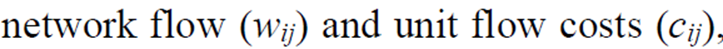

In [9]:
dir_name = os.path.dirname(os.path.realpath('__file__'))

file_name = 'CAB25'
file_path = os.path.join(dir_name,file_name + '.csv')

# Load demand data
w = pd.read_csv(file_path,nrows=25,header=None)
w.index += 1
w.columns += 1

# Load unit cost data
c = pd.read_csv(file_path,skiprows = 26,nrows=25,header=None)
c.index += 1
c.columns += 1

In [10]:
w

1      2       3       4      5      6      7      8      9      10  \
1       0   6469    7629   20036   4690   6194  11688   2243   8857   7248   
2    6469      0   12999   13692   3322   5576   3878   3202   6699   4198   
3    7629  12999       0   35135   5956  14121   5951   5768  16578   4242   
4   20036  13692   35135       0  19094  35119  21423  27342  51341  15826   
5    4690   3322    5956   19094      0   7284   3102   1562   7180   1917   
6    6194   5576   14121   35119   7284      0   5023   3512  10419   3543   
7   11688   3878    5951   21423   3102   5023      0  11557   6479  34261   
8    2243   3202    5768   27342   1562   3512  11557      0   5615   7095   
9    8857   6699   16578   51341   7180  10419   6479   5615      0   4448   
10   7248   4198    4242   15826   1917   3543  34261   7095   4448      0   
11   3559   2454    3365   28537   2253   2752  10134  10753   5076   4370   
12   9221   7975   22254   65387   5951  14412  27350  30362  22463  17267   
13  10099   1186    1841   12980   1890   2043   6929   1783   4783   3929   
14  22866   7443   23665   44097   7097  15642   7961   3437  24609   8602   
15   3388   1162    6517   51525   2009   5014   4678   8897   9969   2753   
16   9986   5105    3541   14354   1340   2016  13511   2509   4224  20013   
17  46618  24817  205088  172895  25303  62034  29801  23273  79945  28080   
18  11639   6532   37669   37305   6031  15385   7549   5160  20001   5971   
19   1380    806    2885   15418   1041   2957   5550   8750   4291   2131   
20   5261   8184   13200   26221   4128   5035   3089   2583  10604   3579   
21   5985   3896    7116   42303   5452   7482   9958   7288  11925   6809   
22   6731   7333   17165   35303   3344   6758  14110  17481  13091   8455   
23   2704   3719    4284   13618   1067   2191   4911   7930   4172   2868   
24  12250   2015    8085   17580   4608   6599   2722   1278  12891   2336   
25  16132    565   51895   40708   7050  14181  10802   8447  19500   5616   

    ...     16      17     18     19     20     21     22     23     24  \
1   ...   9986   46618  11639   1380   5261   5985   6731   2704  12250   
2   ...   5105   24817   6532    806   8184   3896   7333   3719   2015   
3   ...   3541  205088  37669   2885  13200   7116  17165   4284   8085   
4   ...  14354  172895  37305  15418  26221  42303  35303  13618  17580   
5   ...   1340   25303   6031   1041   4128   5452   3344   1067   4608   
6   ...   2016   62034  15385   2957   5035   7482   6758   2191   6599   
7   ...  13511   29801   7549   5550   3089   9958  14110   4911   2722   
8   ...   2509   23273   5160   8750   2583   7288  17481   7930   1278   
9   ...   4224   79945  20001   4291  10604  11925  13091   4172  12891   
10  ...  20013   28080   5971   2131   3579   6809   8455   2868   2336   
11  ...   2809   17291   4462   3239   2309  16003   8381   3033   1755   
12  ...  10037  105507  20040  31780  10822  16450  92083  32908   3865   
13  ...   5926   10653   3062    759   1255   6173   2974   1056   1504   
14  ...   9473  169397  25073   1170  14272   8543   8064   1840  20618   
15  ...   2152   26816   6931   4947   2676   8033  12692   6157   3065   
16  ...      0   21806   4519    886   1742   4782   6453   2022   3546   
17  ...  21806       0   9040  11139  63153  34092  70935  14957  28398   
18  ...   4519    9040      0   2802  30224   7982  14964   4589   6227   
19  ...    886   11139   2802      0   1869   3716  11510   3519    569   
20  ...   1742   63153  30224   1869      0   5020   6610   2139   5431   
21  ...   4782   34092   7982   3716   5020      0   9942   3276   3820   
22  ...   6453   70935  14964  11510   6610   9942      0  35285   2566   
23  ...   2022   14957   4589   3519   2139   3276  35285      0    940   
24  ...   3546   28398   6227    569   5431   3820   2566    940      0   
25  ...   5065  166694  12359   3520  13541  11799  19926   4951   6237   

        25  
1    16132  
2

In [11]:
c

1          2          3          4          5          6   \
1      0.0000   576.9631   946.4954   597.5972   373.8127   559.7673   
2    576.9631     0.0000   369.5327   613.0386   429.1079   312.8831   
3    946.4954   369.5327     0.0000   858.3308   749.6018   556.0706   
4    597.5972   613.0386   858.3308     0.0000   255.0303   311.3071   
5    373.8127   429.1079   749.6018   255.0303     0.0000   225.8954   
6    559.7673   312.8831   556.0706   311.3071   225.8954     0.0000   
7    709.0215  1196.4890  1541.2730   790.1213   794.1726  1009.6890   
8   1208.3280  1502.1400  1764.7910   907.4331  1080.3740  1216.8680   
9    603.6477   405.8975   621.3306   237.0703   238.9440    94.2588   
10   695.2080  1241.9610  1603.1650   932.2173   879.5647  1104.5740   
11   680.7090   960.3459  1250.9620   406.3386   533.1560   694.9153   
12  1936.5720  2318.0760  2600.0780  1741.8730  1889.5280  2047.1220   
13   332.4644   786.5959  1137.3350   485.5564   402.3291   627.1150   
14   592.5679   949.5669  1266.8510  1186.8580   947.3188  1084.5000   
15   908.7715   938.7461  1124.7780   345.8738   598.5410   626.1548   
16   426.1877   999.5005  1368.2670   830.3635   700.4368   922.3181   
17   756.1987   179.2426   190.3157   720.4687   578.3286   409.3542   
18   672.5906    96.2744   274.3105   675.3437   512.3965   365.6853   
19  1590.2240  1999.5840  2299.4290  1447.1040  1570.7250  1743.4320   
20   527.3008   210.7656   494.2224   403.8657   255.6551   104.6478   
21   483.4673   736.3755  1043.4840   255.8823   307.3289   491.1125   
22  2140.9780  2456.2630  2703.4020  1853.6170  2036.1280  2164.8550   
23  2184.4020  2339.5090  2503.8280  1733.1320  1967.2560  2027.3190   
24   408.1648   844.1663  1188.5490  1005.7610   775.2390   933.1960   
25   540.7388    36.4947   405.7886   592.0278   399.2253   298.8486   

           7          8          9          10  ...         16         17  \
1    709.0215  1208.3280   603.6477   695.2080  ...   426.1877   756.1987   
2   1196.4890  1502.1400   405.8975  1241.9610  ...   999.5005   179.2426   
3   1541.2730  1764.7910   621.3306  1603.1650  ...  1368.2670   190.3157   
4    790.1213   907.4331   237.0703   932.2173  ...   830.3635   720.4687   
5    794.1726  1080.3740   238.9440   879.5647  ...   700.4368   578.3286   
6   1009.6890  1216.8680    94.2588  1104.5740  ...   922.3181   409.3542   
7      0.0000   663.8762   982.7378   221.4220  ...   423.7053  1362.8740   
8    663.8762     0.0000  1143.7910   874.5181  ...  1066.5630  1625.8700   
9    982.7378  1143.7910     0.0000  1094.9060  ...   936.2502   489.5645   
10   221.4220   874.5181  1094.9060     0.0000  ...   305.3132  1417.0720   
11   447.8044   551.6299   636.9045   642.2092  ...   674.4790  1096.7120   
12  1249.7630   841.6240  1978.9430  1375.6350  ...  1661.7780  2453.3520   
13   411.1133   880.0728   620.4880   477.4590  ...   348.2725   955.6191   
14  1097.6080  1714.6510  1151.8680   963.7202  ...   675.7505  1098.2820   
15   851.8228   694.0088   535.0244  1046.1190  ...  1039.7700  1018.3990   
16   423.7053  1066.5630   936.2502   305.3132  ...     0.0000  1178.4390   
17  1362.8740  1625.8700   489.5645  1417.0720  ...  1178.4390     0.0000   
18  1288.9660  1574.8220   453.2583  1337.6480  ...  1095.6570    84.3365   
19   895.0908   593.4216  1682.4890  1017.3320  ...  1304.0430  2143.5650   
20  1049.2660  1301.5110   198.9058  1125.0410  ...   918.5615   328.7515   
21   537.6206   780.9512   450.2585   677.0608  ...   601.9917   880.5469   
22  1493.8430   955.8020  2086.8450  1649.6190  ...  1916.5780  2574.0820   
23  1686.6750  1024.5660  1936.3040  1891.1660  ...  2090.0890  2415.4890   
24   912.2104  1519.1740   992.3379   795.2136  ...   496.4224  1008.2000   
25  1161.6760  1475.4790   392.9045  1205.7470  ...   963.0435   215.5610   

           18         19         20         21         22         23  \
1    672.5906  1590.2240   527.3008   483.4673  2140.9780  2184

## Predefined Functions

In [19]:
def check_feasibility(array, n, p):
        flag = True
        hubs = list(set(array))
        for i in range(n):
            if i+1 in hubs:
                if array[i] == i+1:
                    flag *= True
                else:
                    flag *= False
        return flag

## initial solution

In [12]:
def initial_solution(n, p):  
    
    hubs = random.sample(range(1,n),p)
    array = [None] * n
    for i in range(n):
        if i+1 in hubs:
            array[i] = i+1    
        else:
            array[i] = hubs[random.randint(0,p-1)]
    return array

In [13]:
np.random.seed(5)
# test
initial_solution(25, 3)

[20,
 20,
 17,
 18,
 18,
 17,
 17,
 17,
 17,
 18,
 20,
 18,
 20,
 20,
 18,
 18,
 17,
 18,
 18,
 20,
 20,
 18,
 20,
 18,
 18]

## solution evaluation (cost calculation)

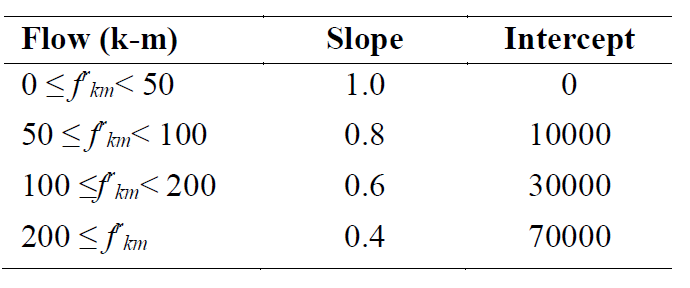

In [15]:
def flowloc_cost_2(flow):
    unit_flow_cost = 0
    
    if flow <0:
        raise ValueError("Flow must be nonnegative")
    elif flow < 50000:
        unit_flow_cost = 0 + 1* flow
    elif flow < 100000:
        unit_flow_cost = 10000 + 0.8* flow
    elif flow < 200000:
        unit_flow_cost = 30000 + 0.6* flow
    else:
        unit_flow_cost = 70000 + 0.4* flow
    return unit_flow_cost


def cost_evaluation(array, w, c):
    total_cost = 0
    
    # identify the hubs
    hubs = set(array)
    
    # calculate collection and distribution cost
    for i in range(1, len(array)+1):
        for j in range(1, len(array)+1):
            total_cost += w[i][j]*(c[i][array[i-1]] + c[array[j-1]][j])
    
    # calculate inter-hub cost
    for k in hubs:
        for m in hubs:
            if k != m:
                interhub_flow = 0
                for i in range(1, len(array)+1):
                    for j in range(1, len(array)+1):
                        if array[i-1] == k and array[j-1] == m:
                            interhub_flow += w[i][j]                   # calculate inter-hub flow
                            
                total_cost += flowloc_cost_2(interhub_flow) * c[k][m]  # calculate inter-hub cost
                
    return total_cost

# GA

## class

In [16]:
iterations = 100

In [17]:
class Ga:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
       
    def ga(self):
        while True:
            parent_1 = initial_solution(self.n, self.p)
            parent_2 = initial_solution(self.n, self.p)

            cutting_point = random.randint(0, 9)
            offspring = parent_1[:cutting_point] + parent_2[cutting_point:]

            if len(set(offspring)) == self.p and check_feasibility(offspring, self.n, self.p):
                break

        return offspring
    
    def ga_best(self):
        ga_initial = self.ga()
        best_ga = ga_initial
        best_ga_cost = cost_evaluation(ga_initial, w, c)

        i = 1
        while i < iterations:
            next_solution = self.ga()
            ga_cost = cost_evaluation(next_solution, w, c)

            if ga_cost < best_ga_cost:
                best_ga = next_solution
                best_ga_cost= ga_cost

            i += 1

        return best_ga, best_ga_cost

In [20]:
time_start = time.time()  

first_ga = Ga(25, 3)
print(first_ga.ga_best())

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([2, 2, 2, 5, 5, 2, 15, 15, 5, 5, 15, 5, 5, 15, 15, 15, 2, 5, 15, 2, 5, 2, 5, 2, 2], 12903779872.849394)
1.4380006790161133


## solutions

Hereafter is the solutions for my algorithms, please don't run this part of code due to long computational time.

### (25, 3)

In [41]:
iterations = 10000

In [42]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Ga(25, 3).ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([13, 18, 18, 13, 13, 18, 8, 8, 18, 13, 8, 8, 13, 13, 13, 18, 18, 18, 13, 18, 13, 13, 13, 18, 18], 11114510693.119436)
([17, 17, 17, 4, 4, 17, 4, 15, 15, 15, 17, 15, 17, 17, 15, 4, 17, 17, 15, 4, 4, 15, 15, 17, 17], 11017791239.865587)
([4, 2, 2, 4, 8, 2, 4, 8, 8, 8, 2, 8, 4, 2, 4, 2, 2, 2, 8, 2, 2, 8, 8, 2, 2], 10648899218.993034)
([4, 20, 20, 4, 20, 20, 13, 4, 13, 13, 20, 13, 13, 20, 13, 13, 20, 20, 4, 20, 13, 4, 13, 20, 20], 11425038855.150599)
([13, 4, 17, 4, 4, 17, 13, 4, 17, 13, 13, 13, 13, 17, 4, 13, 17, 13, 4, 17, 13, 4, 17, 4, 17], 11319851674.320518)
([11, 2, 4, 4, 2, 2, 11, 11, 4, 11, 11, 11, 4, 2, 11, 11, 2, 2, 11, 11, 11, 4, 4, 4, 2], 11114870954.042967)
([6, 8, 9, 6, 6, 6, 6, 8, 9, 9, 8, 8, 6, 9, 6, 9, 6, 9, 8, 9, 9, 8, 8, 6, 6], 11204518554.939156)
([5, 2, 4, 4, 5, 2, 4, 4, 5, 5, 4, 5, 4, 5, 4, 2, 2, 2, 4, 5, 2, 4, 4, 5, 2], 11677790910.689161)
([4, 17, 17, 4, 4, 8, 8, 8, 17, 8, 4, 8, 4, 17, 4, 17, 17, 17, 8, 4, 4, 8, 8, 4, 17], 9912996105.430048)
([1, 17, 17, 21, 1, 21,

In [43]:
sum_NC/10

10977705203.348816

### (25, 5)

In [44]:
iterations = 11200

In [45]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Ga(25, 5).ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([2, 2, 2, 5, 5, 6, 22, 2, 5, 13, 2, 22, 13, 2, 13, 13, 2, 6, 5, 6, 13, 22, 13, 13, 2], 11167527545.039513)
([1, 17, 18, 9, 1, 18, 18, 1, 9, 1, 1, 22, 22, 1, 9, 18, 17, 18, 17, 17, 9, 22, 22, 9, 17], 10839099706.408964)
([4, 2, 2, 4, 22, 2, 10, 2, 4, 10, 10, 22, 2, 2, 4, 10, 18, 18, 4, 4, 18, 22, 2, 10, 2], 11308775928.00685)
([4, 5, 4, 4, 5, 17, 5, 5, 17, 12, 5, 12, 17, 17, 17, 4, 17, 17, 12, 17, 21, 12, 5, 5, 5], 11334585172.438156)
([7, 2, 3, 21, 2, 2, 7, 21, 3, 21, 21, 12, 21, 2, 3, 21, 2, 2, 12, 21, 21, 12, 3, 7, 2], 10679770295.733288)
([2, 2, 18, 9, 9, 17, 17, 17, 9, 9, 9, 12, 18, 17, 2, 9, 17, 18, 12, 2, 2, 12, 18, 17, 2], 10944746108.771315)
([1, 2, 17, 4, 2, 6, 4, 6, 6, 1, 17, 1, 1, 17, 4, 1, 17, 17, 1, 2, 6, 4, 4, 17, 6], 11349647566.809322)
([4, 2, 17, 4, 2, 4, 9, 9, 9, 9, 9, 22, 2, 2, 9, 17, 17, 9, 22, 17, 17, 22, 4, 9, 9], 10760413065.861202)
([9, 19, 9, 9, 5, 6, 17, 19, 9, 5, 9, 19, 5, 17, 6, 6, 17, 6, 19, 9, 6, 19, 19, 5, 6], 11074768691.902576)
([1, 20, 20, 4, 20, 20, 

In [46]:
sum_NC/10

11005493788.73884

# HPSO 

## class

In [24]:
SwarmSize = 10

In [25]:
class Pso_Ga:
    def __init__(self, n, p):
        self.n = n
        self.p = p
    
       
    def pso(self):
        first_row = [None] * self.n
        for i in range(self.n):
            first_row[i] = float("%.2f" %(random.random() + random.randint(0 , self.n*self.p)))

        second_row = [None] * self.n
        for i in range(self.n):
            second_row[i] = random.randint(1, self.p)

        array = [None] * self.n
        ranks_first_row = list(ss.rankdata(first_row))
        hubs = [int(i) for i in ranks_first_row][:self.p]  
        allocations = second_row

        for i in range(self.n):
            if i+1 in hubs:
                array[i] = i+1    
            else:
                array[i] = hubs[allocations[i]-1]

        return array, hubs, allocations
    
    
    def cross_over(self):
        particle_1 = self.pso()
        particle_2 = self.pso()

        hubs = particle_1[1]
        allocations = particle_1[2][:round(self.n/2)] + particle_2[2][round(self.n/2):]
        array = [None] * self.n

        
        for i in range(self.n):
            if i+1 in hubs:
                array[i] = i+1   
            else:
                array[i] = hubs[allocations[i] -1]

        return array, hubs, allocations
    
    
    def pso_ga_best(self):        
        pso_ga_initial = self.cross_over()[0]
        best_pso_ga = pso_ga_initial
        best_pso_ga_cost = cost_evaluation(pso_ga_initial, w, c)

        j = 1
        while j < SwarmSize:
            next_solution = self.cross_over()[0]
            pso_ga_cost = cost_evaluation(next_solution, w, c)

            if pso_ga_cost < best_pso_ga_cost:
                best_pso_ga = next_solution
                best_pso_ga_cost= pso_ga_cost

            j += 1

        return best_pso_ga, best_pso_ga_cost

In [26]:
time_start = time.time() 

first_pso_ga = Pso_Ga(25, 3)
print(first_pso_ga.pso_ga_best())

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([9, 9, 9, 6, 21, 6, 6, 21, 9, 6, 21, 21, 9, 9, 9, 21, 6, 9, 21, 9, 21, 6, 6, 21, 21], 12952182990.491169)
0.1459965705871582


## solutions

Hereafter is the solutions for my algorithms, please don't run this part of code due to long computational time.

### (25, 3)

In [47]:
SwarmSize = 12000

In [48]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Pso_Ga(25, 3).pso_ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time()  
time_sum = time_end - time_start  
print(time_sum)

([9, 2, 2, 9, 8, 9, 8, 8, 9, 9, 8, 8, 9, 9, 8, 2, 2, 9, 8, 9, 9, 8, 2, 2, 2], 10767294131.557198)
([18, 18, 18, 4, 4, 4, 4, 4, 4, 19, 4, 19, 18, 4, 18, 18, 18, 18, 19, 4, 4, 4, 19, 4, 18], 10677312169.236036)
([4, 17, 17, 4, 4, 17, 7, 4, 4, 7, 4, 4, 7, 4, 17, 4, 17, 4, 7, 17, 17, 7, 4, 17, 17], 11406593449.72845)
([5, 2, 2, 5, 5, 2, 5, 8, 2, 2, 5, 8, 2, 5, 5, 2, 2, 2, 5, 2, 5, 5, 5, 2, 2], 10955098844.007088)
([18, 18, 18, 9, 21, 18, 21, 21, 9, 9, 21, 21, 18, 21, 21, 9, 18, 18, 21, 18, 21, 9, 21, 21, 18], 11110308960.13848)
([25, 9, 9, 9, 25, 25, 19, 25, 9, 19, 19, 19, 19, 25, 9, 25, 25, 9, 19, 9, 9, 19, 19, 9, 25], 11017681647.638401)
([6, 25, 25, 6, 6, 6, 21, 21, 25, 6, 21, 21, 6, 6, 6, 6, 25, 25, 21, 25, 21, 21, 25, 21, 25], 11271532101.295004)
([11, 2, 2, 11, 20, 20, 2, 11, 20, 11, 11, 11, 20, 20, 20, 11, 2, 2, 20, 20, 11, 11, 11, 2, 2], 11112407374.794645)
([13, 13, 25, 4, 25, 25, 13, 4, 25, 13, 4, 13, 13, 25, 4, 4, 25, 13, 25, 25, 4, 4, 13, 25, 25], 11407034006.967749)
([21, 25, 

In [49]:
sum_NC/10

11123382463.968805

### (25, 5)

In [50]:
SwarmSize = 11200

In [51]:
sum_NC = 0
time_start = time.time()  

for i in range(10):
    solution = Pso_Ga(25, 5).pso_ga_best()
    print(solution)
    sum_NC += solution[1]

time_end = time.time() 
time_sum = time_end - time_start  
print(time_sum)

([2, 2, 2, 4, 25, 6, 6, 15, 6, 2, 4, 15, 2, 2, 15, 6, 2, 25, 15, 25, 25, 4, 15, 2, 25], 11061228759.091587)
([9, 9, 9, 9, 18, 18, 9, 11, 9, 18, 11, 12, 17, 9, 9, 17, 17, 18, 11, 17, 11, 12, 12, 18, 9], 10716789530.718761)
([21, 2, 25, 9, 5, 9, 21, 9, 9, 21, 9, 21, 21, 2, 21, 5, 25, 2, 5, 5, 21, 21, 25, 9, 25], 11146592616.781378)
([5, 4, 4, 4, 5, 4, 5, 21, 5, 17, 4, 21, 5, 5, 5, 5, 17, 17, 21, 4, 21, 22, 21, 5, 17], 11258946985.812284)
([4, 20, 17, 4, 5, 4, 20, 8, 20, 20, 8, 4, 5, 20, 8, 20, 17, 20, 8, 20, 5, 8, 5, 20, 20], 10955315507.52804)
([13, 13, 17, 4, 4, 4, 13, 8, 17, 17, 11, 8, 13, 4, 13, 13, 17, 17, 13, 17, 4, 8, 8, 17, 17], 9905583867.669407)
([25, 2, 25, 13, 13, 13, 25, 13, 25, 13, 25, 12, 13, 14, 14, 13, 2, 25, 2, 2, 13, 12, 25, 25, 25], 11416592725.641123)
([17, 12, 17, 4, 5, 7, 7, 7, 5, 7, 7, 12, 17, 17, 4, 7, 17, 4, 5, 17, 4, 12, 5, 17, 5], 11171670112.843758)
([2, 2, 2, 21, 2, 21, 21, 17, 17, 17, 13, 22, 13, 17, 13, 2, 17, 17, 21, 2, 21, 22, 22, 2, 17], 10890421686.182

In [52]:
sum_NC/10

10926855687.189503